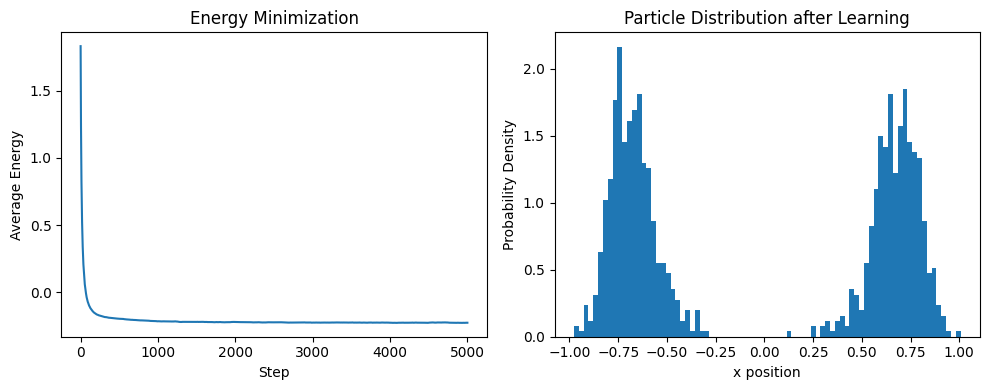

In [ ]:
# === Autonomous Material Simulation: 1D SDE / PF-ODE ===
# Author: 112613037
# Environment: Python 3.x + PyTorch + Matplotlib

import torch
import matplotlib.pyplot as plt

# -----------------------------
# 1. 定義能量函數與其梯度（雙井勢）
# -----------------------------
def energy(x):
    return x**4 - x**2  # 雙穩態能量面

def grad_energy(x):
    return 4 * x**3 - 2 * x

# -----------------------------
# 2. 參數設定
# -----------------------------
n_particles = 1024          # 模擬粒子數
n_steps = 5000              # 時間步
dt = 1e-3                   # 時間增量
g = 0.3                     # 隨機擾動強度（熱擾動）
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x = torch.randn(n_particles, device=device)  # 初始分布
loss_history = []

# -----------------------------
# 3. 模擬隨機微分方程 (Langevin dynamics)
# -----------------------------
for step in range(n_steps):
    drift = -grad_energy(x)                     # f(x_t)
    noise = torch.randn_like(x) * (g * dt**0.5) # g dW_t
    x = x + drift * dt + noise                  # Euler-Maruyama

    # 計算平均能量 (視為 loss)
    loss = energy(x).mean().item()
    loss_history.append(loss)

# -----------------------------
# 4. 視覺化結果
# -----------------------------
x_np = x.cpu().numpy()
plt.figure(figsize=(10,4))

# (a) Loss 曲線
plt.subplot(1,2,1)
plt.plot(loss_history)
plt.xlabel("Step")
plt.ylabel("Average Energy")
plt.title("Energy Minimization")

# (b) 最終樣本分布
plt.subplot(1,2,2)
plt.hist(x_np, bins=80, density=True)
plt.xlabel("x position")
plt.ylabel("Probability Density")
plt.title("Particle Distribution after Learning")

plt.tight_layout()
plt.show()


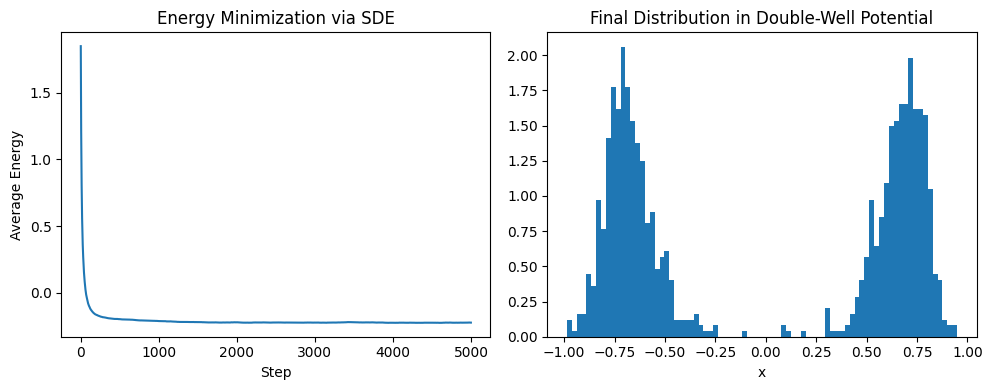

In [ ]:
import torch
import matplotlib.pyplot as plt

def energy(x):
    return x**4 - x**2

def grad_energy(x):
    return 4 * x**3 - 2 * x

n_particles = 1024
n_steps = 5000
dt = 1e-3
D = 0.045
g = torch.sqrt(torch.tensor(2*D))

x = torch.randn(n_particles)
loss_history = []

for step in range(n_steps):
    drift = -grad_energy(x)
    noise = torch.randn_like(x) * (g * dt**0.5)
    x = x + drift * dt + noise
    loss_history.append(energy(x).mean().item())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(loss_history)
plt.title("Energy Minimization via SDE")
plt.xlabel("Step"); plt.ylabel("Average Energy")

plt.subplot(1,2,2)
plt.hist(x.detach().numpy(), bins=80, density=True)
plt.title("Final Distribution in Double-Well Potential")
plt.xlabel("x")

plt.tight_layout(); plt.show()
